In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('./data/gym_churn_us.csv')
df.drop(["Phone", "Near_Location"], axis=1, inplace=True)

In [19]:
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

In [20]:
X.head()

,gender,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,1,1,1,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,0,0,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,0,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [22]:
model = DecisionTreeClassifier(random_state=42)

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8875


In [25]:
model2 = DecisionTreeClassifier(max_depth=8, random_state=42)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9671428571428572
0.8958333333333334


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
# Predictions from your model
y_pred_train = model.predict(X_train)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='binary')
train_recall = recall_score(y_train, y_pred_train, average='binary')
train_f1 = f1_score(y_train, y_pred_train, average='binary')

# Print results
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Train Precision: {train_precision:.4f}')
print(f'Train Recall: {train_recall:.4f}')
print(f'Train F1 Score: {train_f1:.4f}')

Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1 Score: 1.0000


In [28]:
y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary')
test_recall = recall_score(y_test, y_pred, average='binary')
test_f1 = f1_score(y_test, y_pred, average='binary')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

Test Accuracy: 0.8875
Test Precision: 0.7819
Test Recall: 0.7690
Test F1 Score: 0.7754


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       897
           1       0.78      0.77      0.78       303

    accuracy                           0.89      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.89      0.89      0.89      1200



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

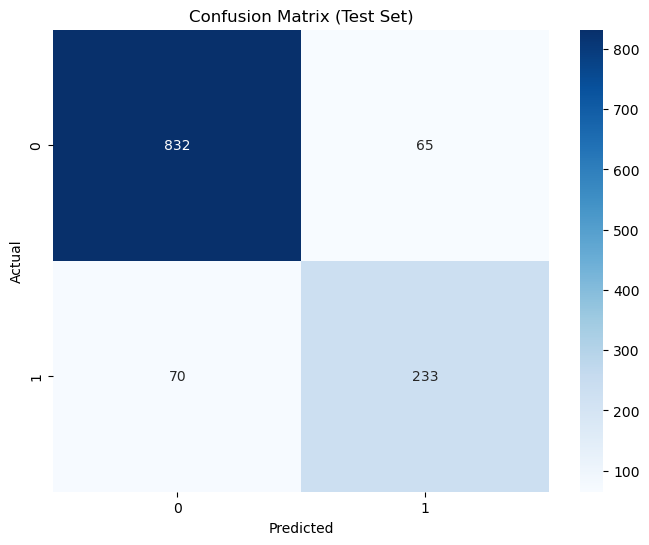

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

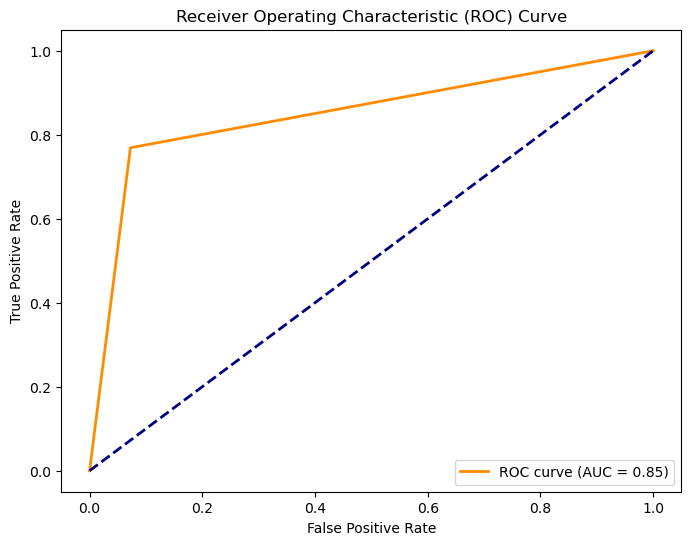

In [32]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [12]:
# RANSACRegressor는 Scikit-learn에서 제공하는 강건 회귀 기법으로, 데이터에 포함된 이상치(outlier)에 영향을 최소화하여 모델을 학습하는 데 사용됩니다.
# RANSAC은 "Random Sample Consensus"의 약자로, 샘플 데이터를 무작위로 선택하여 반복적으로 모델을 학습하고 평가하여 최적의 모델을 찾습니다.

In [13]:
# residual_threshold는 RANSACRegressor에서 중요한 파라미터로, 
# 모델이 inlier(내재값)와 outlier(이상치)를 구분하는 기준으로 사용됩니다. 
# 이 값은 잔차(residual)의 최대 허용치를 설정하며, 이를 통해 어떤 데이터 포인트가 모델에 잘 맞는지를 결정합니다.
# 잔차(Residual)는 모델이 예측한 값과 실제 관측값 간의 차이를 의미합니다

In [1]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ysj\AppData\Local\Temp\ipykernel_8556\2198525560.py:5: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
X = df[['RM']].values
y = df['MEDV'].values

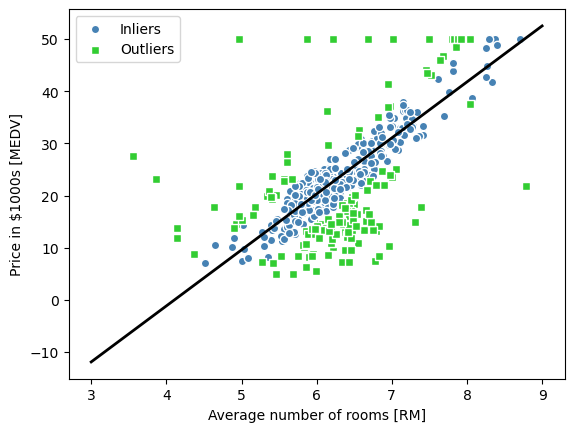

In [16]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',
                         residual_threshold=5.0,
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

plt.show()